In [12]:
# read the parquet file and plot time series data for t2m metric
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import os

plt.rcParams['figure.dpi'] = 120


In [19]:
# Load the parquet file
parquet_file = '../data/processed/timeseries_deterministic_lat53.495_lon10.011.parquet'
table = pq.read_table(parquet_file)
df = table.to_pandas()

# Reset index to make 'time' a column (since it's stored as index in parquet)
df.reset_index(inplace=True)

# Ensure `time` is datetime and data is sorted
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time').reset_index(drop=True)

# Quick sanity checks
print('Rows:', len(df))
print('Columns:', list(df.columns))
print('\nDtypes:\n', df.dtypes)

Rows: 94
Columns: ['time', 'v_10m', 'u_10m', 'v_level61', 'v_level62', 'v_level63', 'v_level64', 'u_level61', 'u_level62', 'u_level63', 'u_level64', 'aswdir_s', 't_2m', 'aswdifd_s', 'latitude', 'longitude']

Dtypes:
 time         datetime64[ns]
v_10m               float64
u_10m               float64
v_level61           float64
v_level62           float64
v_level63           float64
v_level64           float64
u_level61           float64
u_level62           float64
u_level63           float64
u_level64           float64
aswdir_s            float64
t_2m                float64
aswdifd_s           float64
latitude            float64
longitude           float64
dtype: object


In [20]:
# Show a small sample to inspect contents
df.head(10)

,time,v_10m,u_10m,v_level61,v_level62,v_level63,v_level64,u_level61,u_level62,u_level63,u_level64,aswdir_s,t_2m,aswdifd_s,latitude,longitude
0,2025-11-09 00:00:00,1.038366,-0.669157,1.738377,2.065578,1.885515,1.341486,0.087867,-0.565011,-0.993397,-0.845613,0.000000,279.261475,0.000000,53.495,10.011
1,2025-11-09 01:00:00,1.850221,-0.766006,3.134584,3.260803,2.870321,2.589184,-0.326332,-0.943732,-1.048594,-1.000528,0.000000,279.318695,0.000000,53.495,10.011
2,2025-11-09 02:00:00,1.661983,-0.901053,2.740007,3.068834,2.679411,2.289575,0.505492,-0.371954,-1.113032,-1.125682,0.000000,279.205566,0.000000,53.495,10.011
3,2025-11-09 03:00:00,1.985851,-1.022277,2.478523,3.486042,3.239078,2.787301,1.013768,-0.322893,-1.231663,-1.277950,0.000000,279.177216,0.000000,53.495,10.011
4,2025-11-09 04:00:00,1.406042,-1.194817,2.520573,2.966341,2.339600,1.935560,-0.310192,-1.082811,-1.636248,-1.536526,0.000000,279.009460,0.000000,53.495,10.011
5,2025-11-09 05:00:00,1.537490,-1.480899,2.651522,3.441036,2.950176,2.168430,-0.595967,-1.234192,-1.972402,-1.912615,0.000000,279.093689,0.000000,53.495,10.011
6,2025-11-09 06:00:00,1.123877,-0.022039,2.754248,2.750692,2.088335,1.525366,1.500443,0.938313,0.363126,0.070644,0.000000,279.271271,0.000000,53.495,10.011
7,2025-11-09 07:00:00,0.427093,0.398431,1.065655,0.977125,0.891045,0.641510,2.569710,1.969281,1.286743,0.669892,0.000977,279.638916,0.077393,53.495,10.011
8,2025-11-09 08:00:00,0.369020,0.342321,1.186115,0.847731,0.650288,0.475452,2.890924,1.957384,1.277515,0.672471,0.020508,280.028381,2.059543,53.495,10.011
9,2025-11-09 09:00:00,0.923620,-1.124313,1.598837,1.660789,1.634208,1.169088,0.063440,-0.709836,-1.298656,-1.410020,0.070312,280.191376,8.513321,53.495,10.011


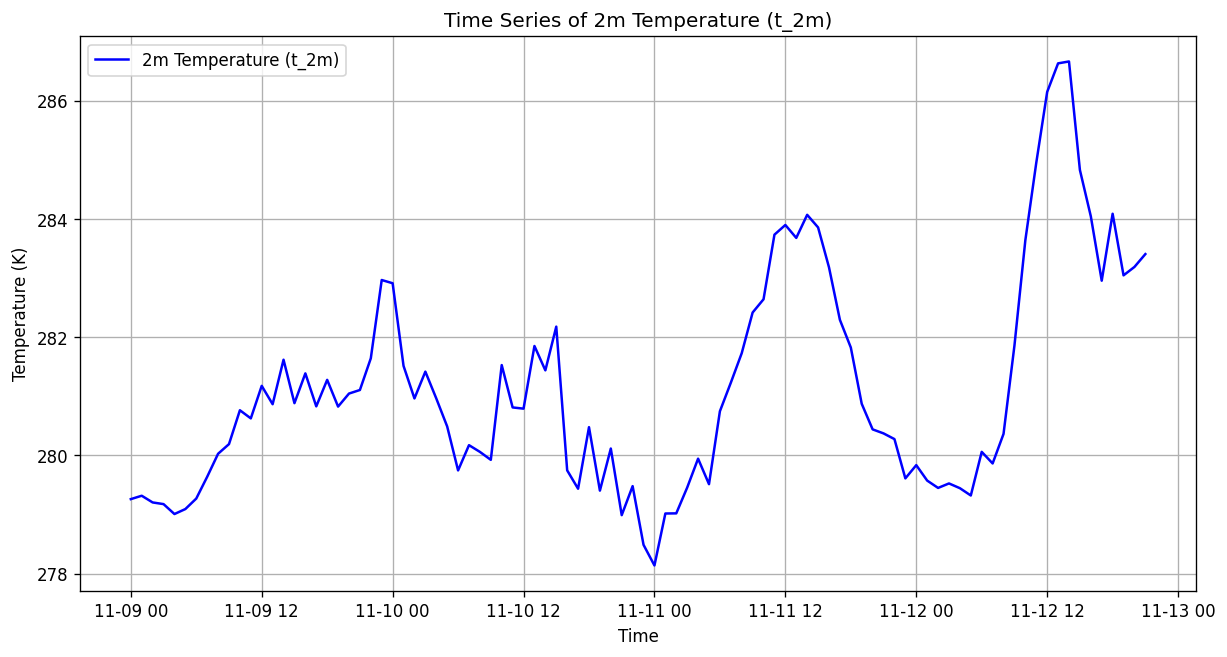

In [22]:
# Simple t_2m time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['t_2m'], label='2m Temperature (t_2m)', color='blue')
plt.xlabel('Time')
plt.ylabel('Temperature (K)')
plt.title('Time Series of 2m Temperature (t_2m)')
plt.legend()
plt.grid()
plt.show()


In [23]:
# Quick checks
print('Time range:', df['time'].min(), 'to', df['time'].max())
print('Sample count:', len(df))
print('Mean t_2m:', df['t_2m'].mean())
print('Std t_2m:', df['t_2m'].std())


Time range: 2025-11-09 00:00:00 to 2025-11-12 21:00:00
Sample count: 94
Mean t_2m: 281.15892061274104
Std t_2m: 1.8547373328032146
